In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

from sklearn.linear_model import LinearRegression
from statsmodels.tsa.arima.model import ARIMA

In [2]:
#Importing the required libraries.

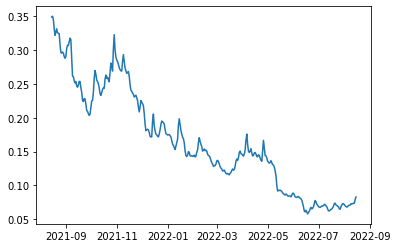

In [3]:
#PROBLEM 0
df=pd.read_csv("../input/da-assignment/doge.csv",index_col=0,parse_dates=True)
plt.plot(df)

In [4]:
#From the above plot, we can see that the data clearly has a downward trend. 
#Since it has a trend component, the data is considered to be non-stationary.

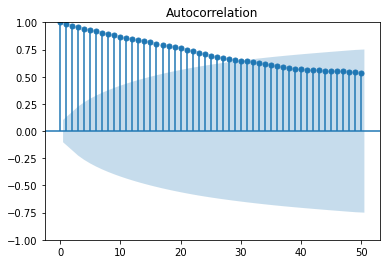

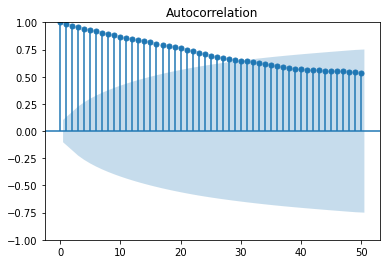

In [5]:
#PROBLEM 1
plot_acf(df,lags=50)

In [6]:
#As we can see from the above plot, the ACF is decreasing and is above the significance range.
#Thus, we can confirm our previous assumption that the given data is non-stationary.

In [7]:
def print_adf_ress(adf_res):
    print('ADF Statistic: %f' % adf_res[0])
    print('p-value: %f' % adf_res[1])
    print('Critical Values:')
    for key, value in adf_res[4].items():
        print('\t%s: %.3f' % (key, value))   

In [8]:
#Defining a function to display adfuller information in an organized manner.

In [9]:
print_adf_ress(adfuller(df.values))

ADF Statistic: -1.558935
p-value: 0.504182
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571


In [10]:
#As we can see, the p-value is much greater than the confidence level of 0.05. 
#The ADF statistic is greater than the critical values at all levels of confidence.
#Hence, we fail to reject the null hypthesis at all levels of confidence.
#We accept the null hypothesis that the time series data is non-stationary.

In [11]:
df_log=np.log(df)
transformed_df=df_log.diff().dropna()
print_adf_ress(adfuller(transformed_df.values))    

ADF Statistic: -5.344295
p-value: 0.000004
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571


In [12]:
#As we can see, the p-value is much greater than the confidence level of 0.05. 
#The ADF statistic is greater than the critical values at all levels of confidence.
#Hence, we retain the null hypthesis at all levels of confidence.
#Therefore, we conclude that the time series data is stationary.

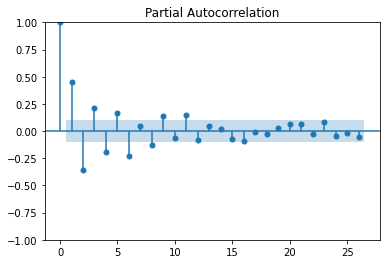

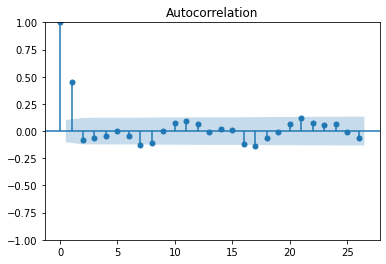

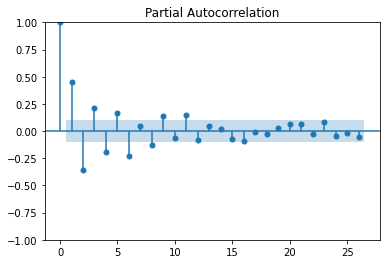

In [13]:
#PROBLEM 3
plot_acf(transformed_df)
plot_pacf(transformed_df,method='ywm')

In [14]:
#In the ACF plot, observe that the first lag is greater than the significance limit.
#Therefore, we take the value of q as 1.
#In the PACF plot, observe that the first and second lag are greater than the significance limit.
#Therefore, we take the value of p as 2.

In [15]:
#PROBLEM 4
arima_df=transformed_df.copy() 
p=2
lag=transformed_df.shift(p)
for i in range(1,p+1):
    arima_df[f'Price_t-{i}']=lag
    arima_df.dropna(inplace=True)

In [16]:
#Creating a clean dataset copy for the Regression model.

In [17]:
x_train=arima_df[[f'Price_t-{i}']].values
y_train=arima_df['Price'].values

lr=LinearRegression()
lr.fit(x_train,y_train)
lr.coef_

array([-0.07956188])

In [18]:
#Building a model for the given data using Linear Regression.

<AxesSubplot:xlabel='Date'>

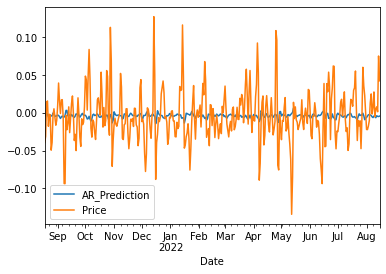

In [19]:
arima_df['AR_Prediction']=x_train.dot(lr.coef_.T)+lr.intercept_
arima_df.plot(y=['AR_Prediction','Price'])

In [20]:
#Creating a new column for the predicted values of the model.
#Plotting the model's predictions and actuals.

In [21]:
#PROBLEM 5
model_arima=ARIMA(df,order=(2,1,1))
res=model_arima.fit()
res.summary()

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Price   No. Observations:                  366
Model:                 ARIMA(2, 1, 1)   Log Likelihood                1440.153
Date:                Sat, 15 Oct 2022   AIC                          -2872.305
Time:                        10:03:43   BIC                          -2856.706
Sample:                    08-15-2021   HQIC                         -2866.106
                         - 08-15-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0540      0.048     -1.137      0.256      -0.147       0.039
ar.L2         -0.1093      0.052     -2.115      0.034      -0.211      -0.008
ma.L1          0.9396      0.021     43.763      0.000       0.898       0.982
sigma2      2.201e-05   7.48e-07     29.428      0.000    2.05e-05    2.35e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              3047.97
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               0.15   Skew:                             1.73
Prob(H) (two-sided):                  0.00   Kurtosis:                        16.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [22]:
#Building a model using ARIMA and getting its summary.

<AxesSubplot:xlabel='Date'>

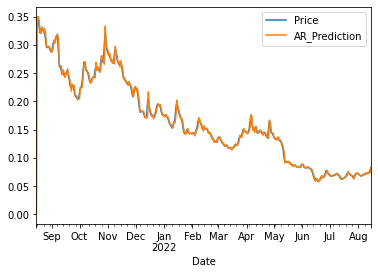

In [23]:
df['AR_Prediction']=res.predict(0,len(df)-1)
df.plot()

In [24]:
#Making forecast predictions and plotting them.

<AxesSubplot:>

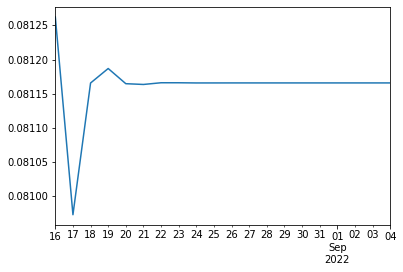

In [25]:
res.forecast(20).plot()

In [26]:
#Plotting the Forecast for 20 dates after the training data set.

In [27]:
#PROBLEM 6
sm.stats.acorr_ljungbox(res.resid,lags=[10],return_df=True)

,lb_stat,lb_pvalue
10,0.929177,0.999877


In [28]:
#Test statistic = 0.929177
#P value = 0.999877 which is greater than 0.05
#Hence, we retain the null hypothesis and conclude that the residuals are independent.